## us700bctq

M 6.0 - 141 km SSW of Kokopo, Papua New Guinea

2020-08-25 19:02:58 (UTC)

5.558°S 151.864°E

23.0 km depth

### Imports

In [1]:
from cioppy import Cioppy
import requests
import json
import datetime
from shapely.wkt import loads
from helpers import *
import matplotlib.pyplot as plt
from PIL import Image

In [2]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

## USGS API 

Get information about the event using the USGS API

In [3]:
usgs_api = 'https://earthquake.usgs.gov/fdsnws/event/1/query' 

Set the event id:

In [4]:
eq_id = 'us7000bctq'

In [5]:
payload = {'eventid': eq_id,
           'format': 'geojson'}
        
r = requests.get(usgs_api, params = payload)

r.status_code

200

In [6]:
record = json.loads(r.content.decode('utf-8'))

Check if the event has a shakemap

In [7]:
'shakemap' in record['properties']['types'].split(',')

True

A Python class for the event to ease accessing the information 

In [8]:
class EarthQuake:
    
    def __init__(self, record):
    
        self.wkt = 'POINT({} {})'.format(record['geometry']['coordinates'][0], 
                                         record['geometry']['coordinates'][1])
        
        self.depth = record['geometry']['coordinates'][2]
        
        self.date = datetime.datetime.fromtimestamp(record['properties']['time'] /1000.0).isoformat() + 'Z'
        
        self.updated = datetime.datetime.fromtimestamp(record['properties']['updated'] /1000.0).isoformat() + 'Z'
        
        self.url = str(record['properties']['url'])
        
        self.title = str(record['properties']['title'])

        try:
            self.abstract = self.title + '. ' + str(record['properties']['products']['impact-text'][0]['contents']['']['bytes']).rstrip()
        except:
            self.abstract = self.title
            
        self.id = str(record['id'])
        
        self.quakeml = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query?eventid={}&format=quakeml'.format(self.id)).content

        if 'shakemap' in record['properties']['types'].split(','):
            
            # Intensity Contours - Contours of macroseismic intensity.
            self.mmi = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_mmi.json']['url']).content.decode('utf-8'))
            
            # Intensity Contours (Legacy Naming) - Contours of macroseismic intensity.
            self.mi = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_mi.json']['url']).content.decode('utf-8'))
            
            # PGA Contours - Contours of GREATER_OF_TWO_HORIZONTAL peak ground acceleration (%g).
            self.pga = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_pga.json']['url']).content.decode('utf-8'))
            
            # PGV Contours - Contours of GREATER_OF_TWO_HORIZONTAL peak ground velocity (cm/s).            
            self.pgv = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_pgv.json']['url']).content.decode('utf-8'))
            
            # SA(0.3) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 0.3 sec spectral acceleration (%g).
            self.psa0p3 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa0p3.json']['url']).content.decode('utf-8'))
            
            # SA(1.0) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 1.0 sec spectral acceleration (%g).
            self.psa1p0 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa1p0.json']['url']).content.decode('utf-8'))
            
            # SA(3.0) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 3.0 sec spectral acceleration (%g).
            self.psa3p0 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa3p0.json']['url']).content.decode('utf-8'))
            


In [9]:
eq = EarthQuake(record)

Access the event peak ground velocity

In [10]:
eq.pgv

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'value': 0.2,
    'units': 'cms',
    'color': '#a7dfff',
    'weight': 4},
   'geometry': {'type': 'MultiLineString',
    'coordinates': [[[150.05, -4.532749],
      [150.074943, -4.522409],
      [150.143065, -4.415089],
      [150.26047, -4.257121],
      [150.421661, -4.082525],
      [150.523908, -3.989271],
      [150.623678, -3.909972],
      [150.723448, -3.839339],
      [150.855761, -3.758276],
      [150.865992, -3.733333]],
     [[152.861582, -3.733333],
      [152.871813, -3.758276],
      [153.007338, -3.841416],
      [153.101303, -3.908029],
      [153.201073, -3.987062],
      [153.30593, -4.082525],
      [153.4671, -4.257121],
      [153.578696, -4.406774],
      [153.63341, -4.493071],
      [153.658352, -4.512401]],
     [[150.05, -5.82806],
      [150.066628, -5.823414],
      [150.07649, -5.811855],

## Discover the data pipeline data items

The data pipeline processess the Sentinel-1 SLC pairs with DIAPASON and DLR's InSAR-Browse

The entry point to access these products is the set of the data processing pipelines data items in 'out' status

In [11]:
search_params = {}

search_params['cat'] = '[{},dataitem,out]'.format(eq_id)
search_params['count'] = '100'

In [12]:
ciop = Cioppy()

In [13]:
data_items = ciop.search(end_point='https://catalog.terradue.com/gep-usgs-pager-0001/search', 
                         params=search_params,
                         output_fields='identifier,title')

In [14]:
data_items

[{'identifier': '492cc295c7dbfb4cea8fbcc1ede09c12',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-08-23T19:32:51.5140000Z/slave:2020-09-04T19:32:26.2790000Z]'},
 {'identifier': 'e197364e3ef2c27582a7fb077fc1873f',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-08-23T19:32:25.7500000Z/slave:2020-09-04T19:32:26.2790000Z]'},
 {'identifier': '45863546f6ec9a652c889449f714cddd',
  'title': '[DI Out] DLR InSAR Browse coseismic pair [master:2020-08-23T19:32:25.7500000Z/slave:2020-09-04T19:32:26.2790000Z]'},
 {'identifier': '226b194b0dd8a68a13fcbb82a7692730',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-08-15T08:14:22.2500000Z/slave:2020-08-27T08:14:23.0700000Z]'},
 {'identifier': '23591a7b4a82d2140baceafea8353306',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-08-15T08:14:22.2500000Z/slave:2020-08-27T08:14:23.0700000Z]'}]

### Discover the results produced by the data items

In [15]:
results = []

for data_item in data_items: 
    
    print(data_item['identifier'])
    
    search_params = {}

    search_params['uid'] = data_item['identifier']
    
    data_item_results  = ciop.search(end_point='https://catalog.terradue.com/gep-usgs-pager-0001/search', 
                                     params=search_params,
                                     output_fields='link:results')
    
    search_results = ciop.search(end_point=data_item_results[0]['link:results'], 
                     params={},
                     output_fields='title,startdate,enddate,enclosure')
    
    for result in search_results:
        
        # get only the DIAPASON results:
        if 'DIAPASON' in result['title']:
            
            results.append({'title': result['title'], 
                            'enclosure': result['enclosure'], 
                            'type': 'data'})
            
            # add the RGB composites 
            results.append({'title': result['title'], 
                            'enclosure': result['enclosure'].replace('.tiff', '.rgb.tiff'),
                            'type': 'rgb'})

492cc295c7dbfb4cea8fbcc1ede09c12
e197364e3ef2c27582a7fb077fc1873f
45863546f6ec9a652c889449f714cddd
226b194b0dd8a68a13fcbb82a7692730
23591a7b4a82d2140baceafea8353306


In [16]:
results

[{'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-08-23T19:32:25 2020-09-04T19:32:26',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/501e0d14-0d44-11eb-86dc-0242ac110002/0011689-200723125048137-oozie-oozi-W/pha_34038_34213_ortho.tiff',
  'type': 'data'},
 {'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-08-23T19:32:25 2020-09-04T19:32:26',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/501e0d14-0d44-11eb-86dc-0242ac110002/0011689-200723125048137-oozie-oozi-W/pha_34038_34213_ortho.rgb.tiff',
  'type': 'rgb'},
 {'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwrapped Phase - 2020-08-23T19:32:25 2020-09-04T19:32:26',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_di

## Plot the phase

Create a bounding box around the event centre

In [17]:
bbox = list(loads(eq.wkt).buffer(0.5).bounds)

bbox

[151.3638, -6.0579, 152.3638, -5.0579]

DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-08-23T19:32:25 2020-09-04T19:32:26
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-08-23T19:32:25 2020-09-04T19:32:26
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwrapped Phase - 2020-08-23T19:32:25 2020-09-04T19:32:26


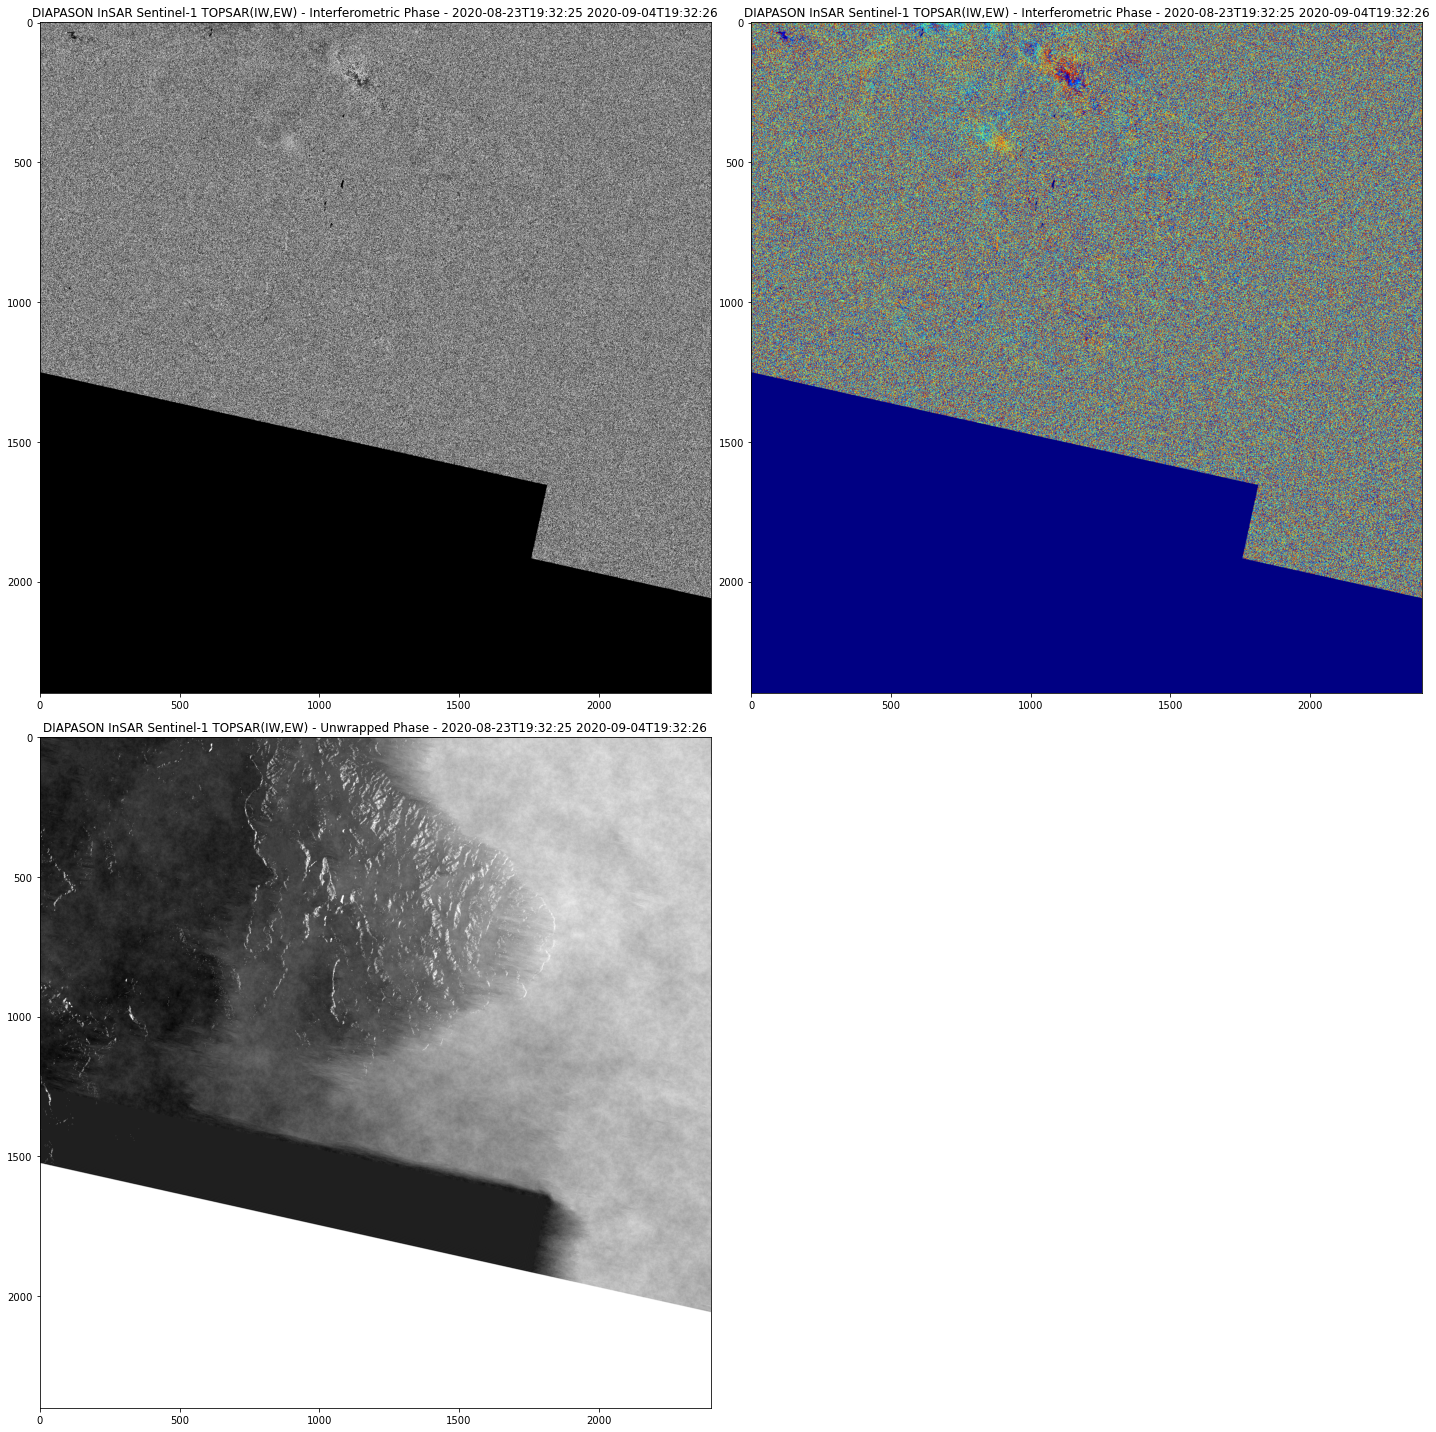

In [18]:
fig = plt.figure(figsize=(20,20))

i=1
for index, result in enumerate(results):
   
    print (result['title'])
    
    img_data = vsi_download(enclosure=result['enclosure'],
                            bbox=bbox)
    
    a=fig.add_subplot(2, 2, 0+i)
    a.set_title(result['title'])
    width = 12
    height = 12
   
    if img_data.shape[2] == 4:
        
        data = np.dstack((img_data[:,:,0], 
                          img_data[:,:,1],
                          img_data[:,:,2])).astype(np.uint8) 

        img = Image.fromarray(data)
        imgplot = plt.imshow(img)

    else:
        
        data = img_data
    
        imgplot = plt.imshow(data.reshape(data.shape[0],
                                          data.shape[1]), 
                             cmap=plt.cm.gray) 

    i = i+1
    
    # stop plotting the results after a few images
    if i == 4: break   
        
plt.tight_layout()
fig = plt.gcf()
plt.show()

fig.clf()
plt.close()